# Author: Sandesh Basnet

# Crime Rate Forecast

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [2]:
df1 = pd.read_csv('./Datasets/Chicago_Crimes_2005_to_2007.csv', error_bad_lines= False)
df2 = pd.read_csv('./Datasets/Chicago_Crimes_2008_to_2011.csv', error_bad_lines= False)
df3 = pd.read_csv('./Datasets/Chicago_Crimes_2012_to_2017.csv', error_bad_lines= False)

C:\Users\Dell\AppData\Local\Temp\ipykernel_2640\1825440609.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv('./Chicago_Crimes_2005_to_2007.csv', error_bad_lines= False)
Skipping line 533719: expected 23 fields, saw 24

C:\Users\Dell\AppData\Local\Temp\ipykernel_2640\1825440609.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df2 = pd.read_csv('./Chicago_Crimes_2008_to_2011.csv', error_bad_lines= False)
Skipping line 1149094: expected 23 fields, saw 41

C:\Users\Dell\AppData\Local\Temp\ipykernel_2640\1825440609.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df3 = pd.read_csv('./Chicago_Crimes_2012_to_2017.csv', error_bad_lines= False)


In [3]:
df = pd.concat([df1, df2, df3])

In [4]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [5]:
df.tail()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1456709,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,...,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"
1456713,6253474,10508692,HZ250517,05/03/2016 11:38:00 PM,001XX E 75TH ST,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,...,6.0,69.0,26,1178696.0,1855324.0,2016,05/10/2016 03:56:50 PM,41.758309,-87.620658,"(41.75830866, -87.620658418)"


In [6]:
df.shape

(6017767, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017767 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool

In [8]:
df.isnull().sum()

Unnamed: 0                  0
ID                          0
Case Number                 7
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1974
Arrest                      0
Domestic                    0
Beat                        0
District                   89
Ward                       92
Community Area           1844
FBI Code                    0
X Coordinate            74882
Y Coordinate            74882
Year                        0
Updated On                  0
Latitude                74882
Longitude               74882
Location                74882
dtype: int64

In [9]:
df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [10]:
new_df = df[['ID', 'Date', 'Primary Type', 'Location Description', 'Arrest', 'Domestic']]
new_df = pd.DataFrame(new_df)

In [11]:
new_df.head()

,ID,Date,Primary Type,Location Description,Arrest,Domestic
0,4673626,04/02/2006 01:00:00 PM,OTHER OFFENSE,RESIDENCE,False,False
1,4673627,02/26/2006 01:40:48 PM,NARCOTICS,SIDEWALK,True,False
2,4673628,01/08/2006 11:16:00 PM,ASSAULT,OTHER,False,False
3,4673629,04/05/2006 06:45:00 PM,BATTERY,RESIDENCE,False,False
4,4673630,02/17/2006 09:03:14 PM,NARCOTICS,ALLEY,True,False


In [12]:
new_df.isnull().sum()

ID                         0
Date                       0
Primary Type               0
Location Description    1974
Arrest                     0
Domestic                   0
dtype: int64

In [13]:
new_df.dropna(inplace= True)

In [14]:
new_df.isnull().sum()

ID                      0
Date                    0
Primary Type            0
Location Description    0
Arrest                  0
Domestic                0
dtype: int64

In [15]:
new_df.shape

(6015793, 6)

In [16]:
new_df.drop_duplicates(inplace= True)

In [17]:
new_df.shape

(4334604, 6)

In [18]:
new_df['Date'] = pd.to_datetime(new_df['Date'], format= '%m/%d/%Y %I:%M:%S %p')

In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4334604 entries, 0 to 1456713
Data columns (total 6 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Location Description  object        
 4   Arrest                bool          
 5   Domestic              bool          
dtypes: bool(2), datetime64[ns](1), int64(1), object(2)
memory usage: 173.6+ MB


In [20]:
new_df['Primary Type'].value_counts()

THEFT                                907126
BATTERY                              778161
CRIMINAL DAMAGE                      499422
NARCOTICS                            473789
OTHER OFFENSE                        264199
BURGLARY                             264106
ASSAULT                              260867
MOTOR VEHICLE THEFT                  196804
DECEPTIVE PRACTICE                   169003
ROBBERY                              165711
CRIMINAL TRESPASS                    122991
WEAPONS VIOLATION                     44333
PROSTITUTION                          40868
PUBLIC PEACE VIOLATION                35027
OFFENSE INVOLVING CHILDREN            29857
CRIM SEXUAL ASSAULT                   17073
SEX OFFENSE                           14672
INTERFERENCE WITH PUBLIC OFFICER      11242
GAMBLING                               9920
LIQUOR LAW VIOLATION                   8276
ARSON                                  6632
HOMICIDE                               5875
KIDNAPPING                      

In [21]:
new_df[new_df['Primary Type']== 'THEFT']['Arrest'].value_counts()

False    803770
True     103356
Name: Arrest, dtype: int64

In [22]:
new_df.index = pd.DatetimeIndex(new_df.Date)
new_df

,ID,Date,Primary Type,Location Description,Arrest,Domestic
Date,,,,,,
2006-04-02 13:00:00,4673626,2006-04-02 13:00:00,OTHER OFFENSE,RESIDENCE,False,False
2006-02-26 13:40:48,4673627,2006-02-26 13:40:48,NARCOTICS,SIDEWALK,True,False
2006-01-08 23:16:00,4673628,2006-01-08 23:16:00,ASSAULT,OTHER,False,False
2006-04-05 18:45:00,4673629,2006-04-05 18:45:00,BATTERY,RESIDENCE,False,False
2006-02-17 21:03:14,4673630,2006-02-17 21:03:14,NARCOTICS,ALLEY,True,False
...,...,...,...,...,...,...
2016-05-03 23:33:00,10508679,2016-05-03 23:33:00,BATTERY,APARTMENT,True,True
2016-05-03 23:30:00,10508680,2016-05-03 23:30:00,CRIMINAL DAMAGE,APARTMENT,True,True
2016-05-03 00:15:00,10508681,2016-05-03 00:15:00,BATTERY,SIDEWALK,False,False


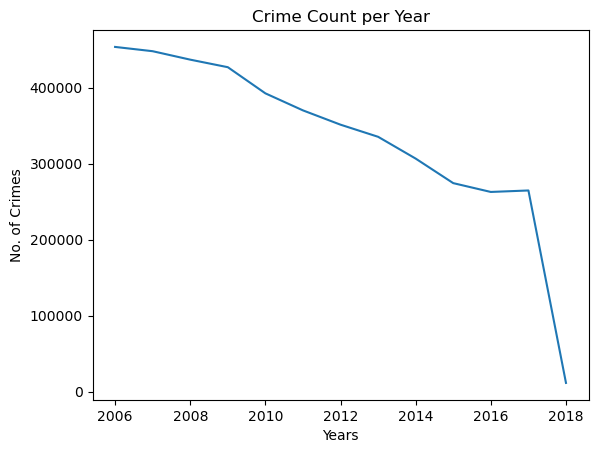

In [23]:
plt.plot(new_df.resample('Y').size())  #size for counts
plt.title('Crime Count per Year')
plt.xlabel('Years')
plt.ylabel('No. of Crimes')
plt.show()

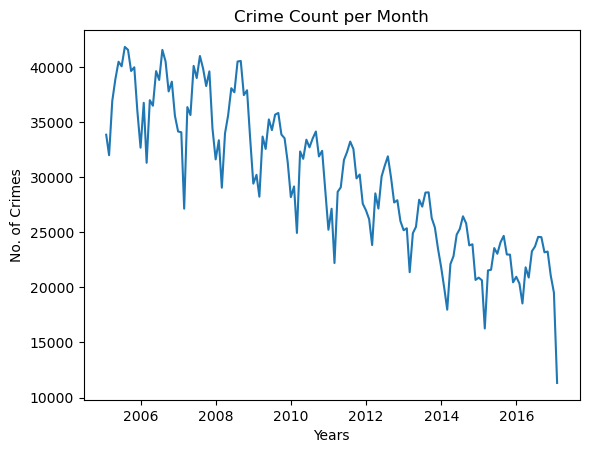

In [24]:
plt.plot(new_df.resample('M').size())  #size for counts
plt.title('Crime Count per Month')
plt.xlabel('Years')
plt.ylabel('No. of Crimes')
plt.show()

# Preparing the data

In [25]:
new_df_prophet = pd.DataFrame(new_df.resample('M').size().reset_index())

In [26]:
new_df_prophet.columns = ['Date', 'Crime Count']

In [27]:
new_df_prophet

,Date,Crime Count
0,2005-01-31,33841
1,2005-02-28,31985
2,2005-03-31,36900
3,2005-04-30,38869
4,2005-05-31,40462
...,...,...
140,2016-09-30,23176
141,2016-10-31,23243
142,2016-11-30,21077
143,2016-12-31,19517


In [28]:
new_df_prophet.rename(columns={'Date': 'ds', 'Crime Count': 'y'}, inplace= True)
new_df_prophet

,ds,y
0,2005-01-31,33841
1,2005-02-28,31985
2,2005-03-31,36900
3,2005-04-30,38869
4,2005-05-31,40462
...,...,...
140,2016-09-30,23176
141,2016-10-31,23243
142,2016-11-30,21077
143,2016-12-31,19517


In [29]:
proph = Prophet()
proph.fit(new_df_prophet)

19:41:35 - cmdstanpy - INFO - Chain [1] start processing
19:41:36 - cmdstanpy - INFO - Chain [1] done processing


# Prediction

In [30]:
pred = proph.make_future_dataframe(periods=24, freq= 'M')
forcast= proph.predict(pred)

In [31]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,39368.917000,32946.425882,35600.395336,39368.917000,39368.917000,-5066.596847,-5066.596847,-5066.596847,-5066.596847,-5066.596847,-5066.596847,0.0,0.0,0.0,34302.320153
1,2005-02-28,39291.720091,31679.294408,34248.571244,39291.720091,39291.720091,-6350.690645,-6350.690645,-6350.690645,-6350.690645,-6350.690645,-6350.690645,0.0,0.0,0.0,32941.029446
2,2005-03-31,39206.252085,36624.270976,39223.203062,39206.252085,39206.252085,-1285.281664,-1285.281664,-1285.281664,-1285.281664,-1285.281664,-1285.281664,0.0,0.0,0.0,37920.970421
3,2005-04-30,39123.541111,36610.754871,39260.027977,39123.541111,39123.541111,-1188.540405,-1188.540405,-1188.540405,-1188.540405,-1188.540405,-1188.540405,0.0,0.0,0.0,37935.000706
4,2005-05-31,39038.073105,39189.878829,41779.973356,39038.073105,39038.073105,1386.526992,1386.526992,1386.526992,1386.526992,1386.526992,1386.526992,0.0,0.0,0.0,40424.600097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2018-09-30,18630.522736,18027.817202,20633.781976,18458.673495,18811.322529,688.098641,688.098641,688.098641,688.098641,688.098641,688.098641,0.0,0.0,0.0,19318.621378
165,2018-10-31,18517.540999,18207.895248,20965.392885,18334.868956,18708.682582,1112.199142,1112.199142,1112.199142,1112.199142,1112.199142,1112.199142,0.0,0.0,0.0,19629.740141
166,2018-11-30,18408.203833,15148.823005,17795.024279,18212.634241,18618.018107,-1955.364886,-1955.364886,-1955.364886,-1955.364886,-1955.364886,-1955.364886,0.0,0.0,0.0,16452.838947
167,2018-12-31,18295.222095,13534.179999,16156.699525,18085.669533,18522.844969,-3493.349480,-3493.349480,-3493.349480,-3493.349480,-3493.349480,-3493.349480,0.0,0.0,0.0,14801.872615


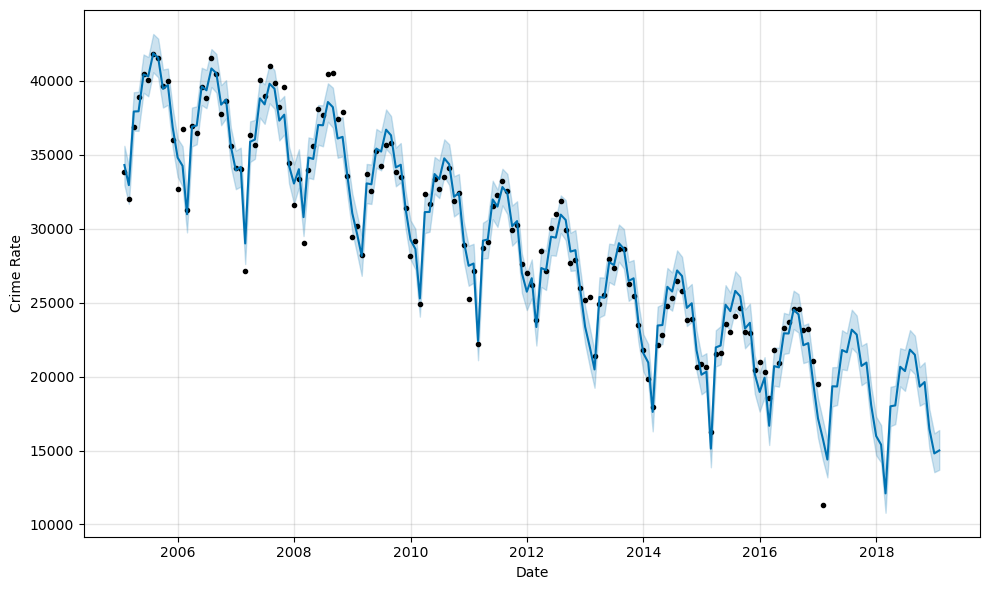

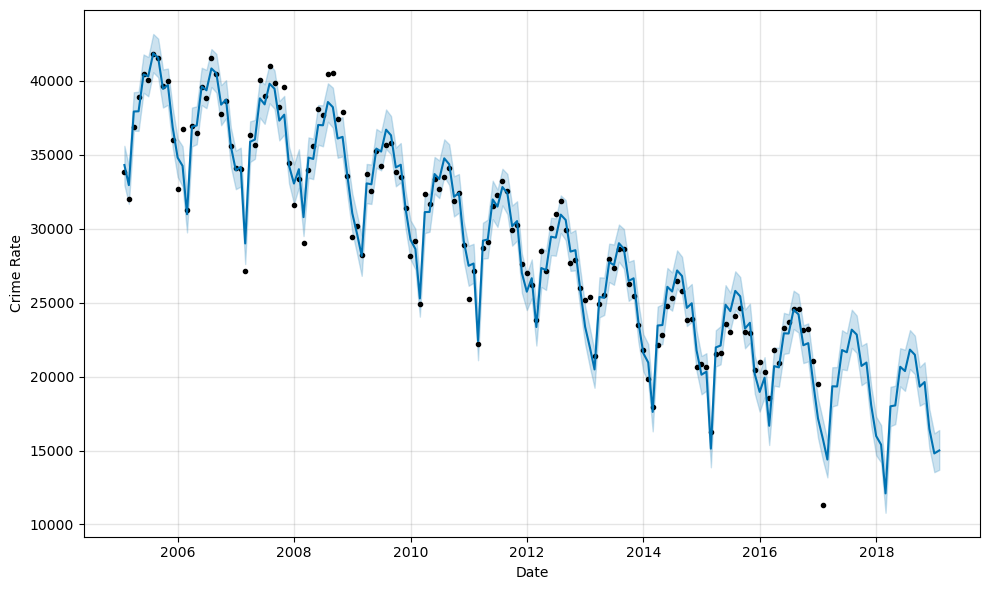

In [32]:
proph.plot(forcast, xlabel='Date', ylabel= 'Crime Rate') 
#black dots are historical data
#blue line is model predictions
#light blue shadow is a 95 confidence interval around the prediction

 # Saving Model

In [35]:
import json
from prophet.serialize import model_from_json, model_to_json

with open('prophet_model.json', 'w') as fout:
    json.dump(model_to_json(proph), fout)    #saving a model

In [36]:
with open('prophet_model.json', 'r') as fin:
    pro = model_from_json(json.load(fin))  #loading the model

C:\Users\Dell\anaconda3\Lib\site-packages\prophet\serialize.py:160: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')
  setattr(model, attribute, pd.Timestamp.utcfromtimestamp(model_dict[attribute]).tz_localize(None))


In [37]:
pred= pro.make_future_dataframe(periods=24, freq= 'M')
forcast= pro.predict(pred)

In [38]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,39368.917000,32982.800433,35583.734060,39368.917000,39368.917000,-5066.596847,-5066.596847,-5066.596847,-5066.596847,-5066.596847,-5066.596847,0.0,0.0,0.0,34302.320153
1,2005-02-28,39291.720091,31664.366264,34316.303412,39291.720091,39291.720091,-6350.690645,-6350.690645,-6350.690645,-6350.690645,-6350.690645,-6350.690645,0.0,0.0,0.0,32941.029446
2,2005-03-31,39206.252085,36525.508224,39258.317221,39206.252085,39206.252085,-1285.281664,-1285.281664,-1285.281664,-1285.281664,-1285.281664,-1285.281664,0.0,0.0,0.0,37920.970421
3,2005-04-30,39123.541111,36646.695401,39240.457362,39123.541111,39123.541111,-1188.540405,-1188.540405,-1188.540405,-1188.540405,-1188.540405,-1188.540405,0.0,0.0,0.0,37935.000706
4,2005-05-31,39038.073105,39104.149517,41677.622736,39038.073105,39038.073105,1386.526992,1386.526992,1386.526992,1386.526992,1386.526992,1386.526992,0.0,0.0,0.0,40424.600097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2018-09-30,18630.522736,18034.797383,20720.652777,18461.650373,18810.743494,688.098641,688.098641,688.098641,688.098641,688.098641,688.098641,0.0,0.0,0.0,19318.621378
165,2018-10-31,18517.540999,18288.344491,20984.650970,18336.037626,18712.602959,1112.199142,1112.199142,1112.199142,1112.199142,1112.199142,1112.199142,0.0,0.0,0.0,19629.740141
166,2018-11-30,18408.203833,15208.241383,17782.709577,18210.539387,18615.781460,-1955.364886,-1955.364886,-1955.364886,-1955.364886,-1955.364886,-1955.364886,0.0,0.0,0.0,16452.838947
167,2018-12-31,18295.222095,13429.326035,16139.435887,18083.281439,18516.910954,-3493.349480,-3493.349480,-3493.349480,-3493.349480,-3493.349480,-3493.349480,0.0,0.0,0.0,14801.872615


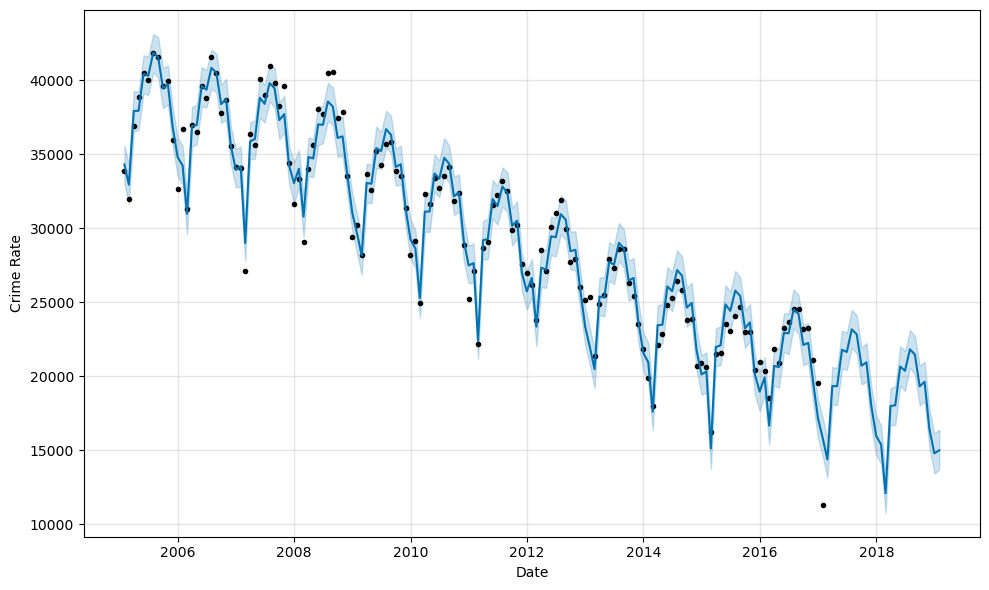

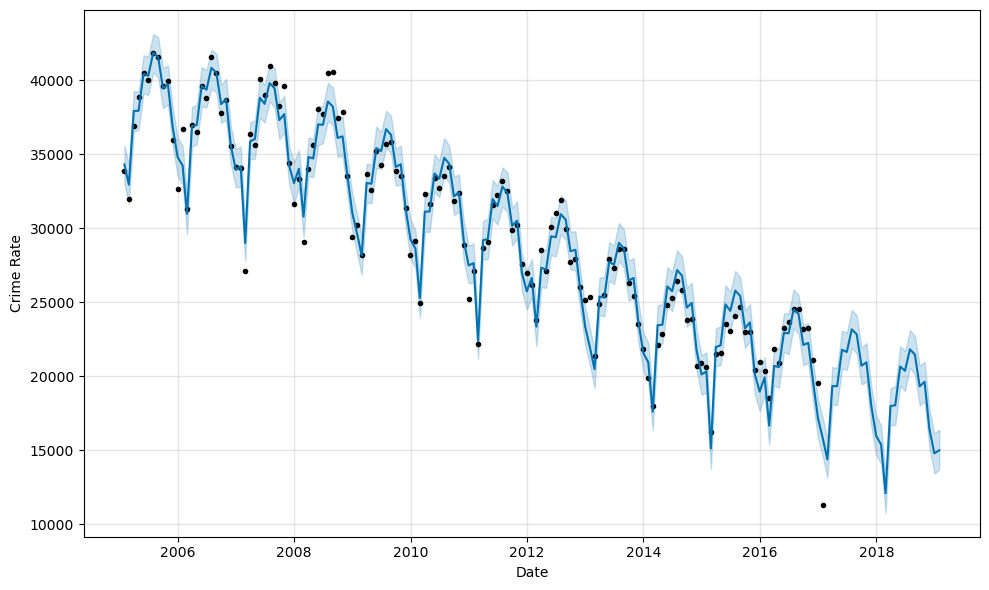

In [39]:
pro.plot(forcast, xlabel= 'Date', ylabel= 'Crime Rate')